In [17]:
#EUREC4A_HALO_BAHAMAS-Radiometer_20200122a.nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200130a.nc'
fh = Dataset(my_example_nc_file, mode='r')
print(fh.variables.keys())

odict_keys(['TIME', 'IRS_ALT', 'IRS_ATA', 'IRS_HDG', 'IRS_LAT', 'IRS_LON', 'IRS_P', 'IRS_PHI', 'IRS_Q', 'IRS_R', 'IRS_THE', 'F_RTSTH', 'F_RTSTR', 'F_RTLTH', 'F_RTLTR', 'F_RBSTH', 'F_RBSTR', 'F_RBSTB', 'F_RBLTH', 'F_RBLTR', 'HP', 'PS', 'FUL', 'FUS', 'SUN_ALT', 'TS', 'SUN_AZI', 'COSBETA_COSTHETA', 'FDSC', 'FDL'])


In [18]:
SWu = fh.variables['FDSC'][:]
SWd = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
time = fh.variables['TIME'][:]
SWU = pd.DataFrame(SWu.T)
SWD = pd.DataFrame(SWd.T)
LWU = pd.DataFrame(LWu.T)
LWD = pd.DataFrame(LWd.T)
corrected_swu = pd.read_csv('corrected_FDSC.csv',',', header=None, names=['index','SWU'])
corrected_swu.drop(['index'],axis=1)
TIME = pd.DataFrame(time.T)/1000
TIME
df = pd.concat([TIME,SWU,SWD,LWU,LWD,corrected_swu.SWU],axis =1)
#df = pd.concat([TIME,SWU,SWD,LWU,LWD],axis =1)
df.columns = ['Time', 'ShortWave_UP', 'ShortWave_DOWN','LongWave_UP', 'LongWave_DOWN','ShortWave_UP_corrected']
#df.columns = ['Time', 'ShortWave_UP', 'ShortWave_DOWN','LongWave_UP', 'LongWave_DOWN']
df['Time'] = df.loc[:,'Time'].round()
df_new = df.groupby('Time').mean()
df_new.to_csv('df_bacardi.csv',header=None)

In [19]:
bacardi = pd.read_csv('df_bacardi.csv', header=None, names=['Time','ShortWave_UP', 'ShortWave_DOWN','LongWave_UP', 'LongWave_DOWN','ShortWave_UP_corrected'])
#bacardi = pd.read_csv('df_bacardi.csv', header=None, names=['Time','ShortWave_UP', 'ShortWave_DOWN','LongWave_UP', 'LongWave_DOWN'])

bacardi

,Time,ShortWave_UP,ShortWave_DOWN,LongWave_UP,LongWave_DOWN,ShortWave_UP_corrected
0,40774.0,166.11490,10.939877,380.22833,468.84314,193.586187
1,40775.0,154.46822,11.931045,387.16592,468.67157,181.939510
2,40776.0,142.55368,15.627613,382.07324,467.37840,170.024974
3,40777.0,136.23163,19.822153,381.23270,466.78170,163.702918
4,40778.0,126.99187,23.250025,383.22210,465.31058,154.463165
...,...,...,...,...,...,...
13723,54497.0,1062.59200,100.719760,419.04346,537.57794,1090.063296
13724,54498.0,1057.98140,87.716430,415.41700,540.85187,1085.452753
13725,54499.0,1051.47720,61.949306,416.41727,546.09644,1078.948523
13726,54500.0,1040.79640,50.127697,412.55197,550.61220,1068.267738


In [13]:
hour = 13*3600
mins = 17*60
sec = 33
total_sec = hour+mins+sec
print(total_sec)
#start = datetime.datetime(2020, 1, 31, 15, 17, 19)
#end = datetime.datetime(2020, 1, 31, 15, 36, 49)
# start = datetime.datetime(2020, 1, 30, 13, 12, 35)
# end = datetime.datetime(2020, 1, 30, 13, 17, 33)
#47555,47853

47853


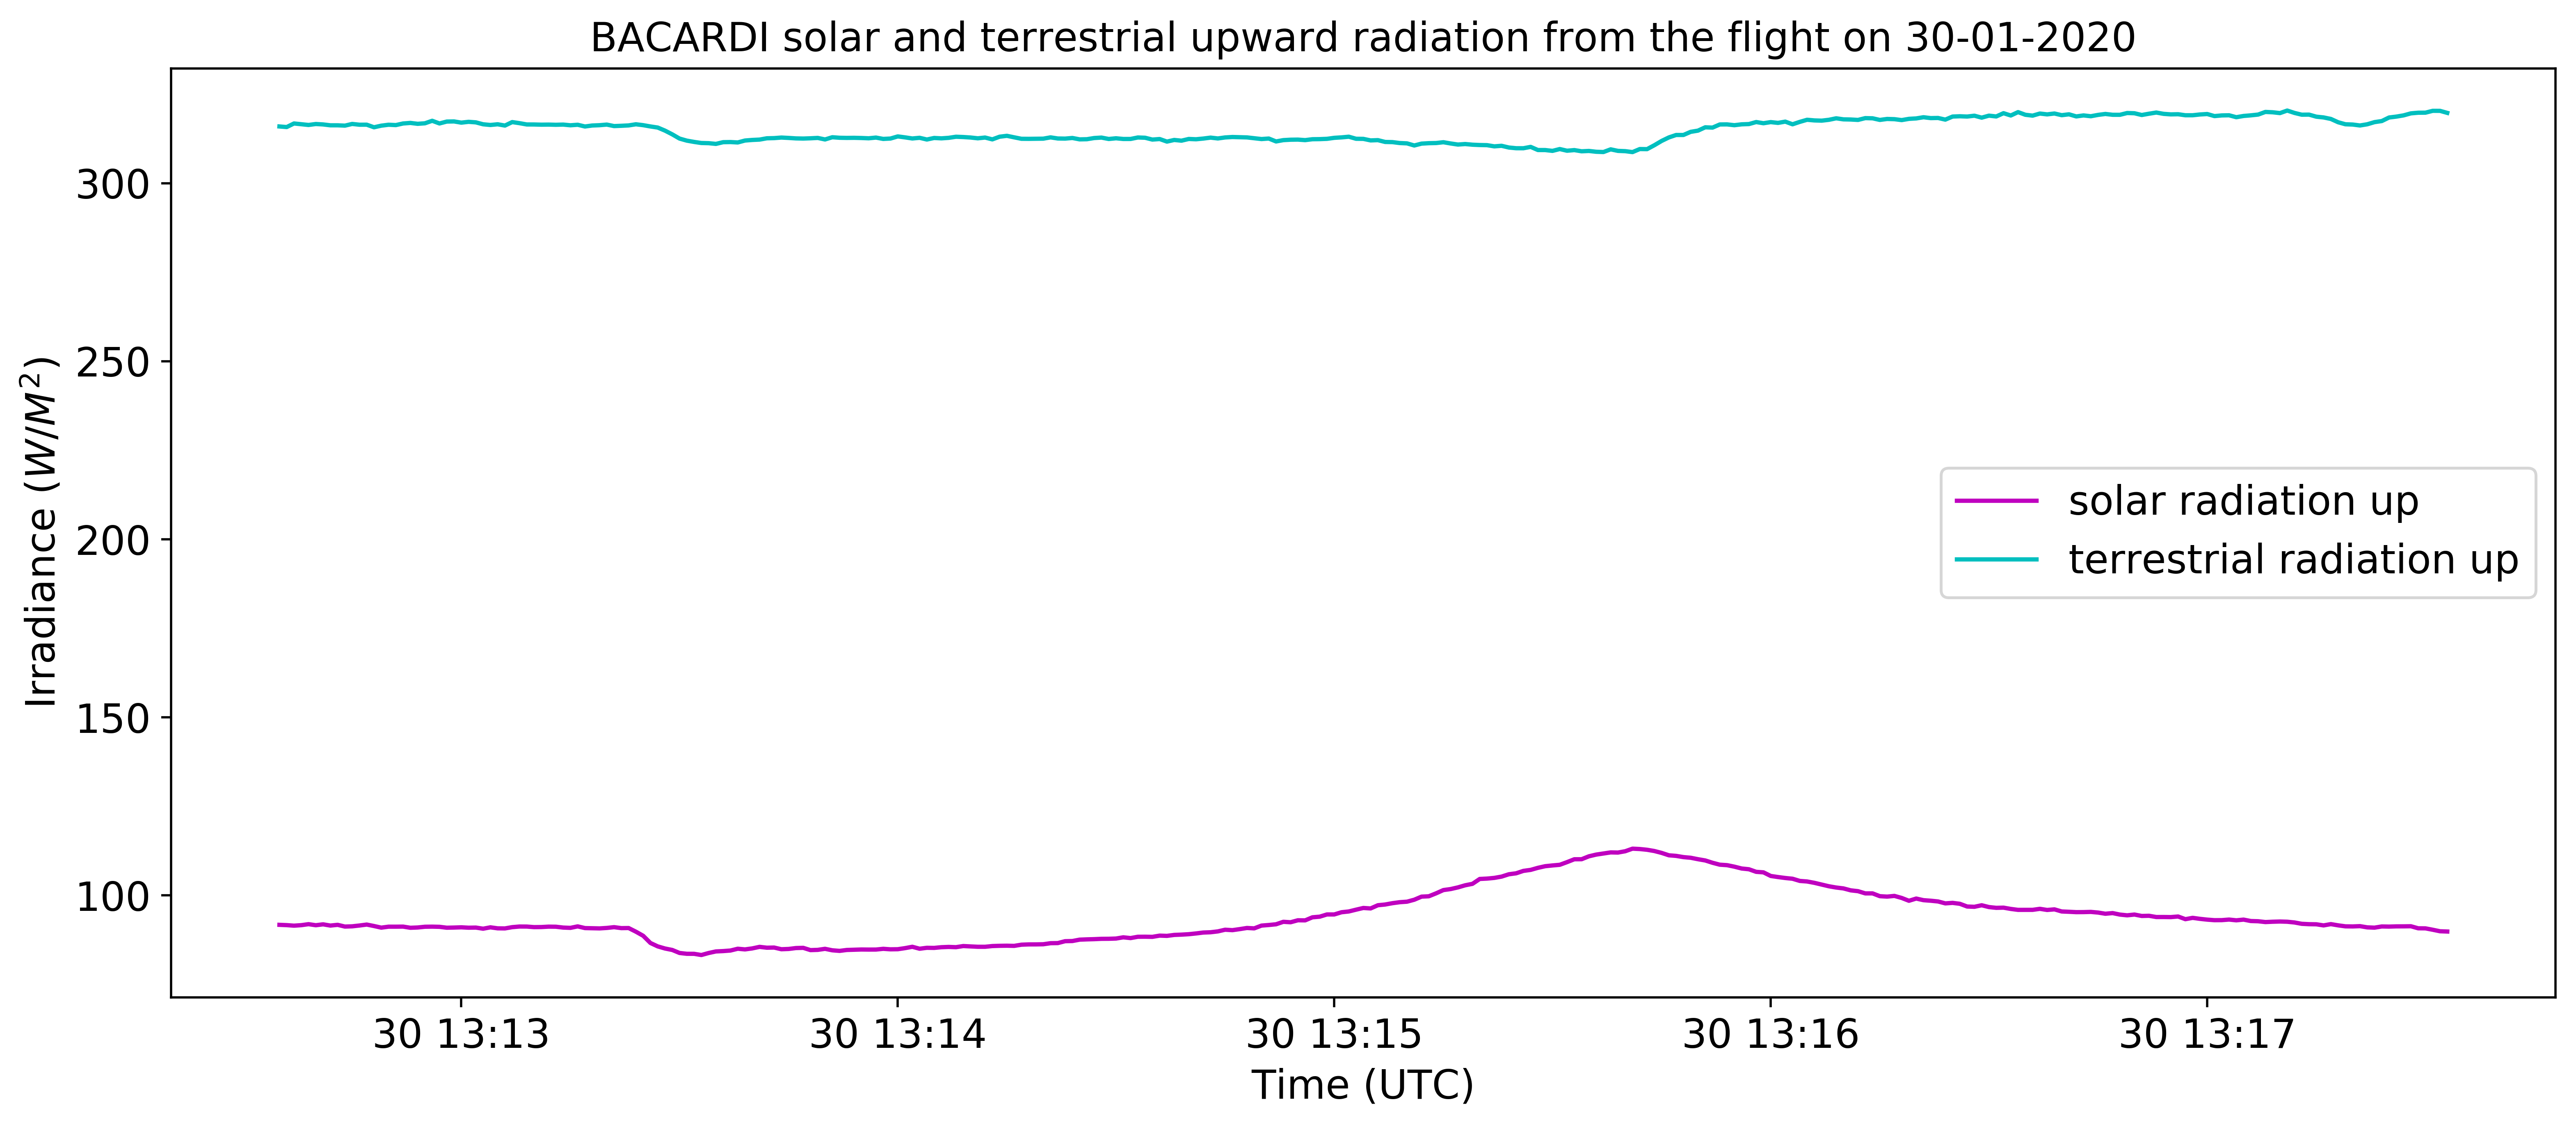

In [16]:
gb1= bacardi.loc[bacardi['Time'] == 47555.0].index[0]
gb2= bacardi.loc[bacardi['Time'] == 47853.0].index[0]
gb1,gb2
gd = bacardi.iloc[6781:7080,:].reset_index(drop=True)
import datetime
strt = datetime.datetime(2020, 1, 30, 13, 12, 35)
ed = datetime.datetime(2020, 1, 30, 13, 17, 33)
dlta = ed - strt
time_dlta = []
for j in range(dlta.seconds + 1):
    time_dlta.append(strt + datetime.timedelta(seconds=j))
df_time_dlta = pd.DataFrame(time_dlta)
df_time_dlta.columns = ['time']
plt.figure(figsize=(15,6),dpi=500)
plt.title('BACARDI solar and terrestrial upward radiation from the flight on 30-01-2020', fontsize =14)
#plt.plot(df_time_dlta.time,gd.ShortWave_UP_corrected, 'r', label = 'solar radiation up')
plt.plot(df_time_dlta.time,gd.ShortWave_DOWN, 'm', label = 'solar radiation up')
#plt.plot(df_time_dlta.time,gd.LongWave_UP, 'y', label = 'terrestrial radiation up')
plt.plot(df_time_dlta.time,gd.LongWave_DOWN, 'c', label = 'terrestrial radiation up')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Time (UTC)',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.show()

In [76]:
time_11_36_38_no_filter = bacardi[bacardi.Time==41798.0][['ShortWave_UP','ShortWave_DOWN','LongWave_UP','LongWave_DOWN','ShortWave_UP_corrected']]
time_14_52_60_no_filter = bacardi[bacardi.Time==53570.0][['ShortWave_UP','ShortWave_DOWN','LongWave_UP','LongWave_DOWN','ShortWave_UP_corrected']]
time_18_39_32_BP10740 = bacardi[bacardi.Time==67172.0][['ShortWave_UP','ShortWave_DOWN','LongWave_UP','LongWave_DOWN','ShortWave_UP_corrected']]
#time_11_36_38_no_filter
#time_18_39_32_BP10740
time_14_52_60_no_filter

,ShortWave_UP,ShortWave_DOWN,LongWave_UP,LongWave_DOWN,ShortWave_UP_corrected
12288,1100.371,300.4153,56.794334,313.8531,1137.17069


In [21]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(54501)


[15, 8, 21]

In [22]:
import datetime
start = datetime.datetime(2020, 1, 30, 11, 19, 34)
end = datetime.datetime(2020, 1, 30, 15, 8, 21)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_time_delta.columns = ['time']
df_time_delta.shape

(13728, 1)

In [86]:
concat = pd.concat([bacardi,df_time_delta],axis=1)
concat.to_csv('concat.csv',sep=' ')

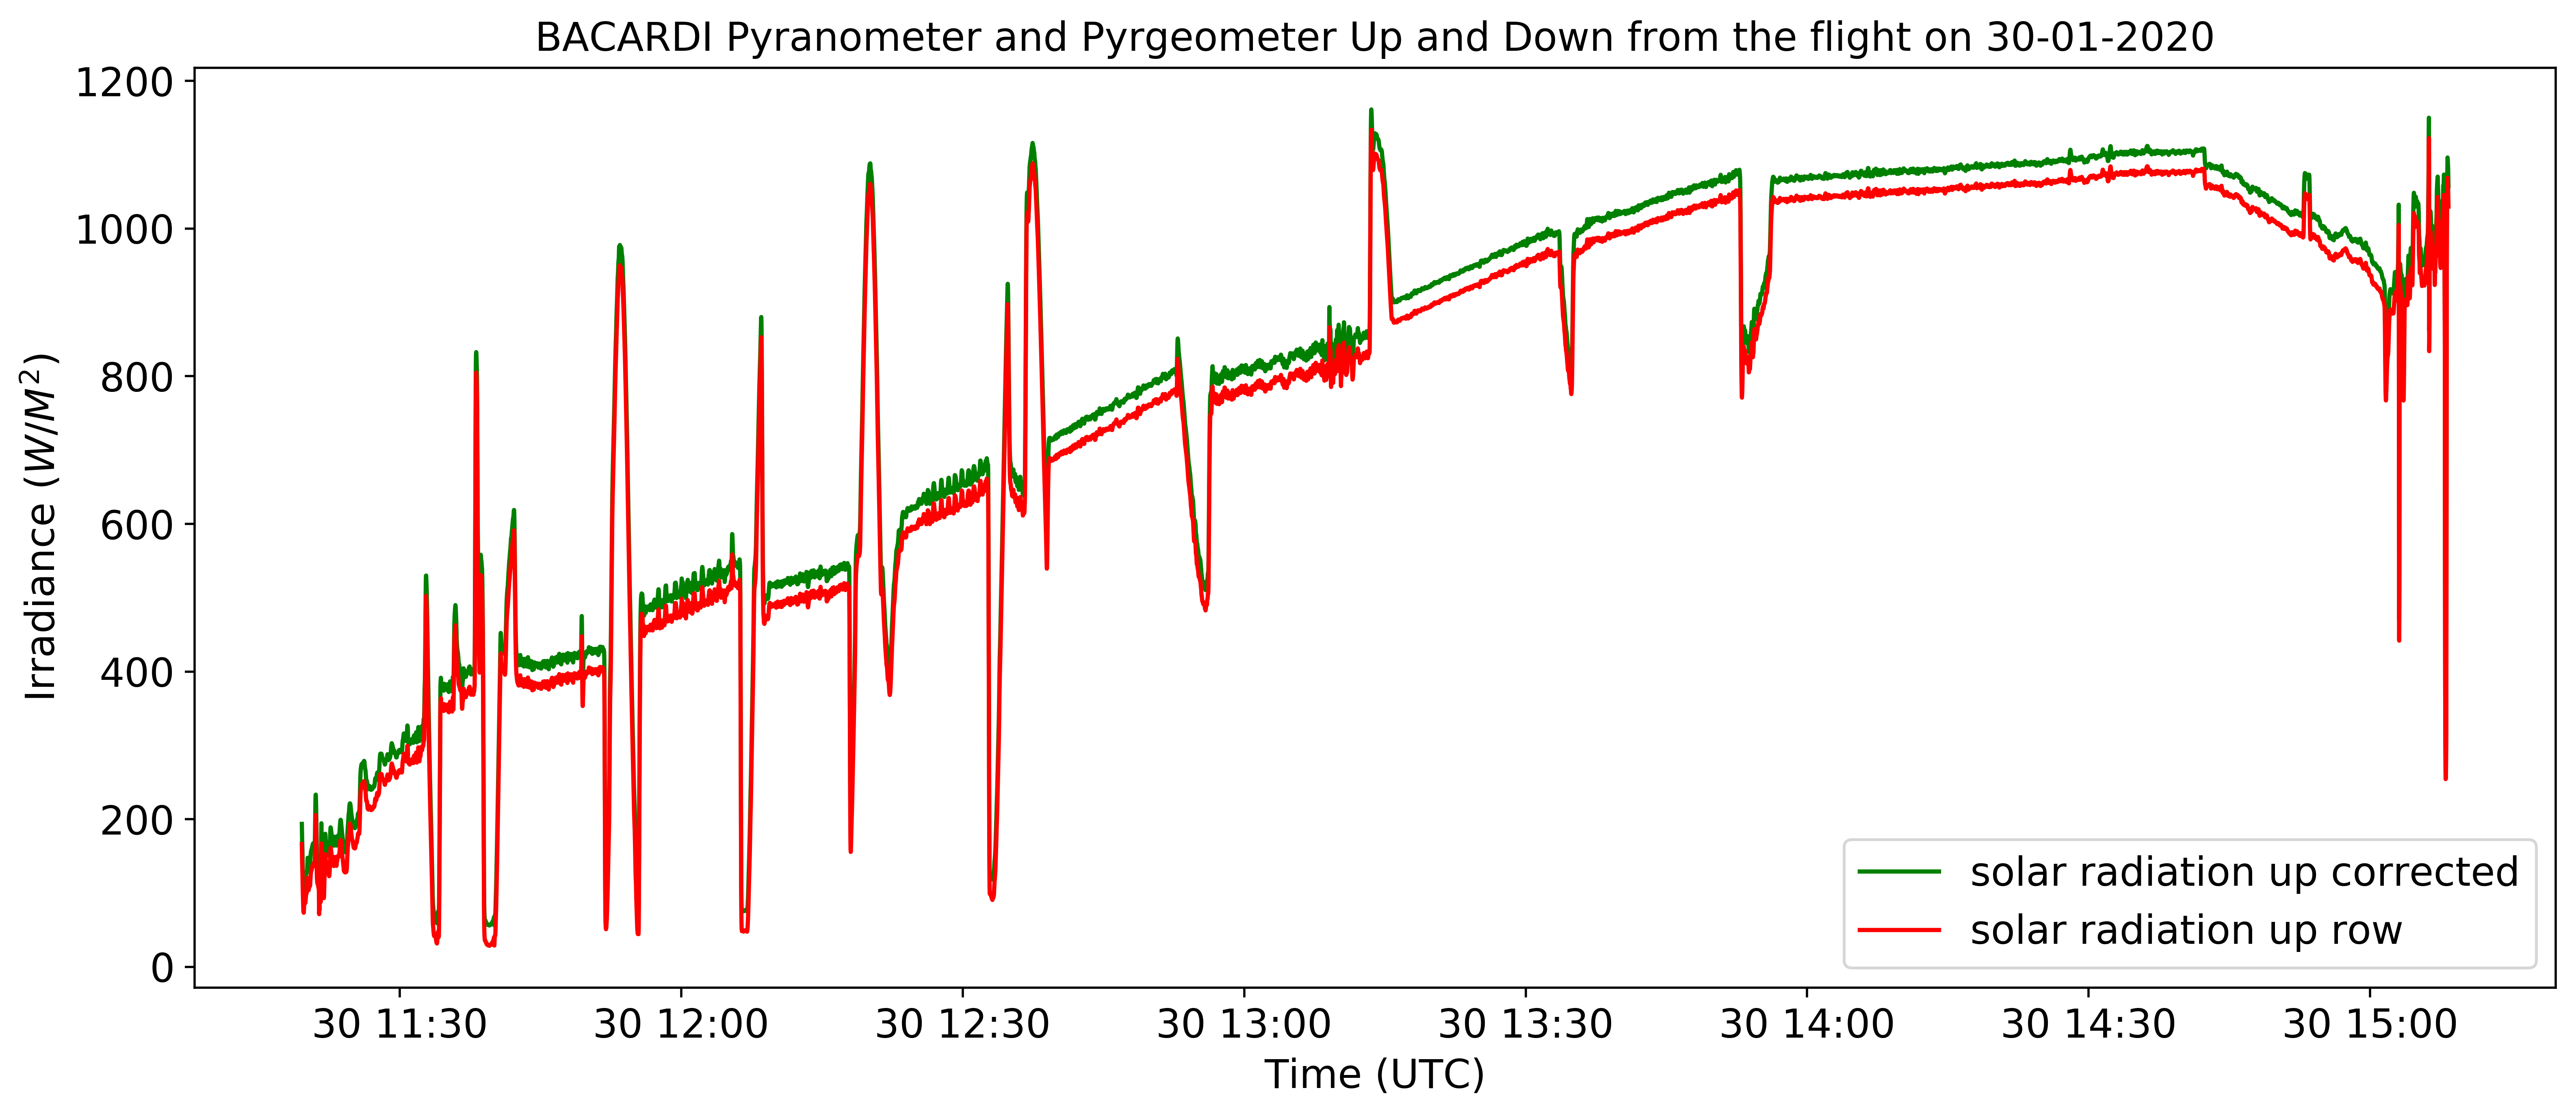

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15,6),dpi=500)
plt.title('BACARDI Pyranometer and Pyrgeometer Up and Down from the flight on 30-01-2020', fontsize =14)
plt.plot(df_time_delta.time,bacardi.ShortWave_UP_corrected, 'g', label = 'solar radiation up corrected')
plt.plot(df_time_delta.time,bacardi.ShortWave_UP, 'r', label = 'solar radiation up row')
#plt.plot(df_time_delta.time,bacardi.ShortWave_DOWN, 'm', label = 'solar radiation down')
#plt.plot(df_time_delta.time,bacardi.LongWave_UP, 'y', label = 'terrestrial radiation up')
#plt.plot(df_time_delta.time,bacardi.LongWave_DOWN, 'c', label = 'terrestrial radiation down')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Time (UTC)',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.show()

In [33]:
import os
os.walk('.')

<generator object walk at 0x000002B71D97AF48>

In [ ]:
# import datetime 
# def convert(n): 
#     return str(datetime.timedelta(seconds = n)) 
# time = []
# for i in bacardi_22jan.Time:
#     t = convert(i)
#     time.append(t)
# date_time = pd.DataFrame(time)
# date_time.columns= ['time']
# date_time
# df_new = pd.concat([date_time.iloc[:,0:1],df.loc[:,'ShortWave_UP'],df.loc[:,'ShortWave_DOWN'],df.loc[:,'LongWave_UP'],df.loc[:,'LongWave_DOWN']],axis =1)
# df_new.columns = ['time','ShortWave_UP','ShortWave_DOWN','LongWave_UP','LongWave_DOWN']
# df_new